https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

# Agrupar usuarios Twitter de acuerdo a su personalidad con K-means

He filtrado a 140 “famosos” del mundo en diferentes areas: deporte, cantantes, actores, etc. 
Basado en una metodología de psicología conocida como “Ocean: The Big Five” tendemos como características de entrada:

usuario (el nombre en Twitter)
- “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
- “co” =Conscientiousness – grado de orden, prolijidad, organización
- “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
- “ag” = Agreeableness – grado de empatía con los demás, temperamento
- “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- Wordcount – Cantidad promedio de palabras usadas en sus tweets
- Categoria – Actividad laboral del usuario (actor, cantante, etc.)

Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. 
Si bien tenemos 8 columnas de entrada, sólo utilizaremos 3 en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes.
Pero para casos reales, podemos utilizar todas las dimensiones que necesitemos. 
Una de las hipótesis que podríamos tener es: “Todos los cantantes tendrán personalidad parecida” (y así con cada rubro laboral). 
Pues veremos si lo probamos, o por el contrario, los grupos no están relacionados necesariamente con la actividad de estas Celebridades.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("C:/Users/miguel.postigo/Desktop/carpeta/programacion/python/aprendeML/TODO/analisis.csv")
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [4]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


#### 9 categorías -actividades laborales- que son:

- 1-Actor/actriz
- 2-Cantante
- 3-Modelo
- 4-Tv, series
- 5-Radio
- 6-Tecnología
- 7-Deportes
- 8-Politica
- 9-Escritor

In [5]:
#vemos cuantos usuarios hay de cada categoria
print(df.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


In [6]:
df.columns

Index(['usuario', 'op', 'co', 'ex', 'ag', 'ne', 'wordcount', 'categoria'], dtype='object')

In [7]:
df.groupby(by = ['categoria'])['op', 'co', 'ex', 'ag', 'ne', 'wordcount'].describe()

<ipython-input-7-39ac7980fa5e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by = ['categoria'])['op', 'co', 'ex', 'ag', 'ne', 'wordcount'].describe()


op                                                        \
          count       mean       std        min        25%        50%   
categoria                                                               
1          27.0  47.599524  7.577364  31.450855  42.604927  47.646364   
2          34.0  49.948019  8.729807  30.825938  45.635593  49.303897   
3           9.0  48.951536  6.574753  34.186667  47.811742  49.028308   
4          19.0  41.119747  8.130204  30.020465  34.494347  40.073543   
5           4.0  37.761293  8.848045  31.865118  32.965551  34.140945   
6           8.0  43.712496  3.214366  38.913420  41.863707  44.069116   
7          17.0  38.970436  5.868497  31.215455  34.297953  38.766702   
8          16.0  38.228891  3.767311  31.541828  35.720897  37.834454   
9           6.0  39.646524  4.766684  31.750300  37.899177  40.422626   

                                   co             ...         ne             \
                 75%        max count       mean  ...        75%        max   
categoria                                         ...                         
1          52.036313  66.665564  27.0  24.204287  ...   9.593824  12.412500   
2          55.198017  71.696129  34.0  22.659563  ...   8.295882  11.337791   
3          52.750992  57.962308   9.0  22.162074  ...   7.538000  11.225692   
4          45.591408  57.145227  19.0  19.588447  ...   8.809434  11.764583   
5          38.936687  50.898163   4.0  19.846804  ...  11.922676  12.289286   
6          45.370342  48.709282   8.0  23.608437  ...  10.683307  23.978462   
7          41.114000  52.895725  17.0  23.723155  ...  10.956591  12.201221   
8          39.785336  45.162043  16.0  26.313601  ...  11.444330  16.201707   
9          42.023068  45.669015   6.0  21.442152  ...  11.795793  12.730110   

          wordcount                                                         \
              count        mean        std      min         25%        50%   
categoria                                                                    
1              27.0  123.531430  51.211854  12.8702  104.211450  122.77270   
2              34.0   93.962382  30.109328  18.2391   80.576700   93.75330   
3               9.0   95.737133  40.930056   5.0208   97.290100  110.02310   
4              19.0   82.669826  39.137681  26.6870   50.711500   70.13950   
5               4.0   61.084325  14.444294  41.6837   55.710275   63.33465   
6               8.0   84.949100  55.702058  30.8244   45.805950   73.44415   
7              17.0   85.850447  37.008415  37.0945   61.484600   82.17690   
8              16.0  126.280262  52.120402  48.7849   80.829925  114.24300   
9               6.0   75.644217  34.958856  39.6299   56.470375   70.76440   

                                 
                  75%       max  
categoria                        
1          156.471550  217.1832  
2          107.142175  165.5789  
3          117.181400  143.8231  
4          108.010400  159.7727  
5           68.708700   75.9843  
6           95.611950  201.0511  
7          100.646500  177.5606  
8          174.941200  206.5319  
9           78.293425  140.1978  

[9 rows x 48 columns]

### Visualización de Datos
Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

In [17]:
#Partición del dataframe por categorias
df1 = df[df.categoria == 1]
df2 = df[df.categoria == 2]
df3 = df[df.categoria == 3]
df4 = df[df.categoria == 4]
df5 = df[df.categoria == 5]
df6 = df[df.categoria == 6]
df7 = df[df.categoria == 7]
df8 = df[df.categoria == 8]
df9 = df[df.categoria == 9]
#groupby para todas las particiones
df1.groupby(by = ['categoria'])['op', 'co', 'ex', 'ag', 'ne', 'wordcount'].describe()
df9.groupby(by = ['categoria'])['op', 'co', 'ex', 'ag', 'ne', 'wordcount'].describe()
#...

<ipython-input-17-9661edef852d>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(by = ['categoria'])['op', 'co', 'ex', 'ag', 'ne', 'wordcount'].describe()
<ipython-input-17-9661edef852d>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df9.groupby(by = ['categoria'])['op', 'co', 'ex', 'ag', 'ne', 'wordcount'].describe()


op                                                      \
          count       mean       std      min        25%        50%   
categoria                                                             
9           6.0  39.646524  4.766684  31.7503  37.899177  40.422626   

                                   co             ...         ne            \
                 75%        max count       mean  ...        75%       max   
categoria                                         ...                        
9          42.023068  45.669015   6.0  21.442152  ...  11.795793  12.73011   

          wordcount                                                     \
              count       mean        std      min        25%      50%   
categoria                                                                
9               6.0  75.644217  34.958856  39.6299  56.470375  70.7644   

                                
                 75%       max  
categoria                       
9          78.293425  140.1978  

[1 rows x 48 columns]

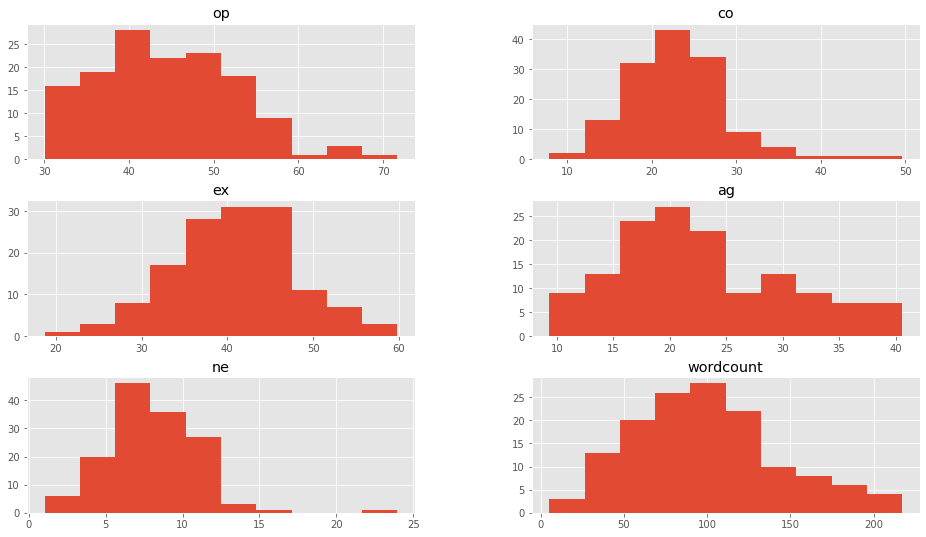

In [14]:
df.drop(['categoria'],1).hist() #borramos la columna de categorias momentaneamente
plt.show()

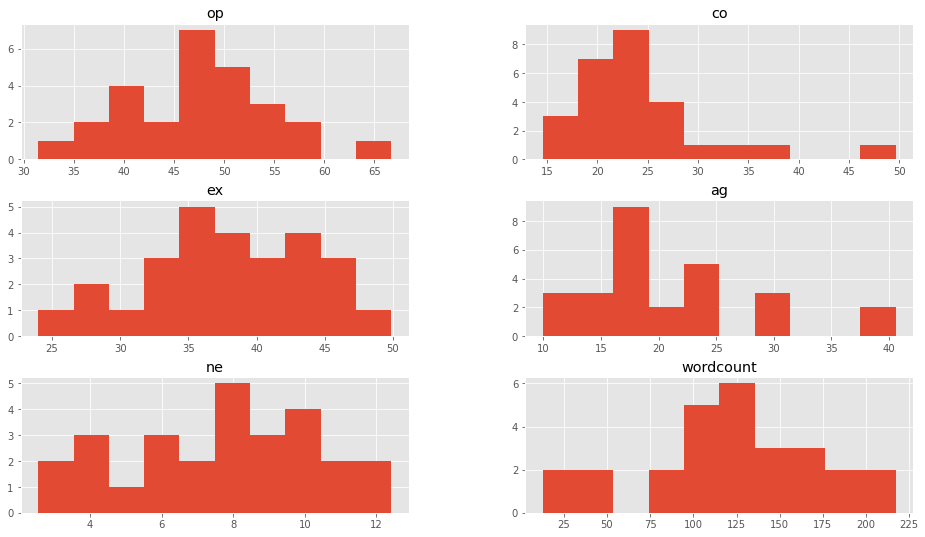

In [15]:
#especificamente para una categoría
df1.drop(['categoria'],1).hist()
plt.show()

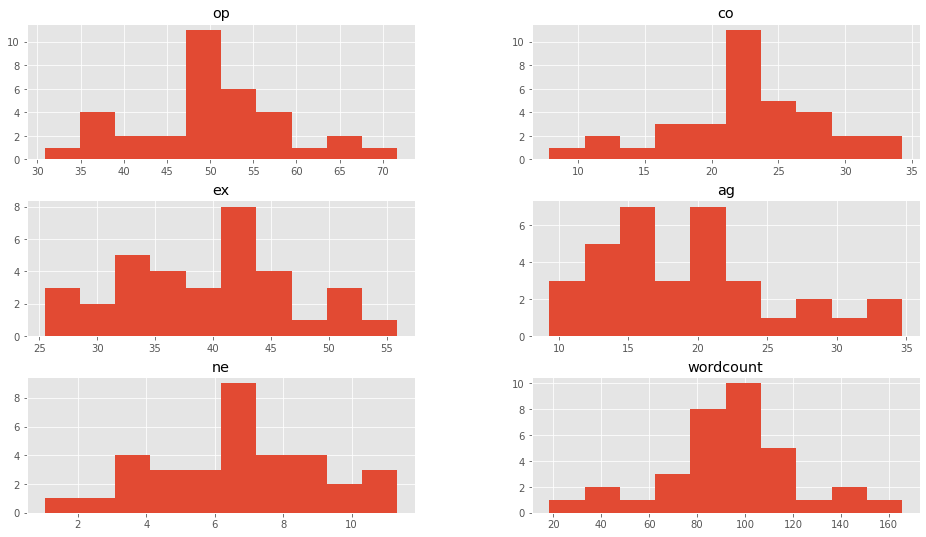

In [18]:
df2.drop(['categoria'],1).hist()
plt.show()

En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

In [26]:
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


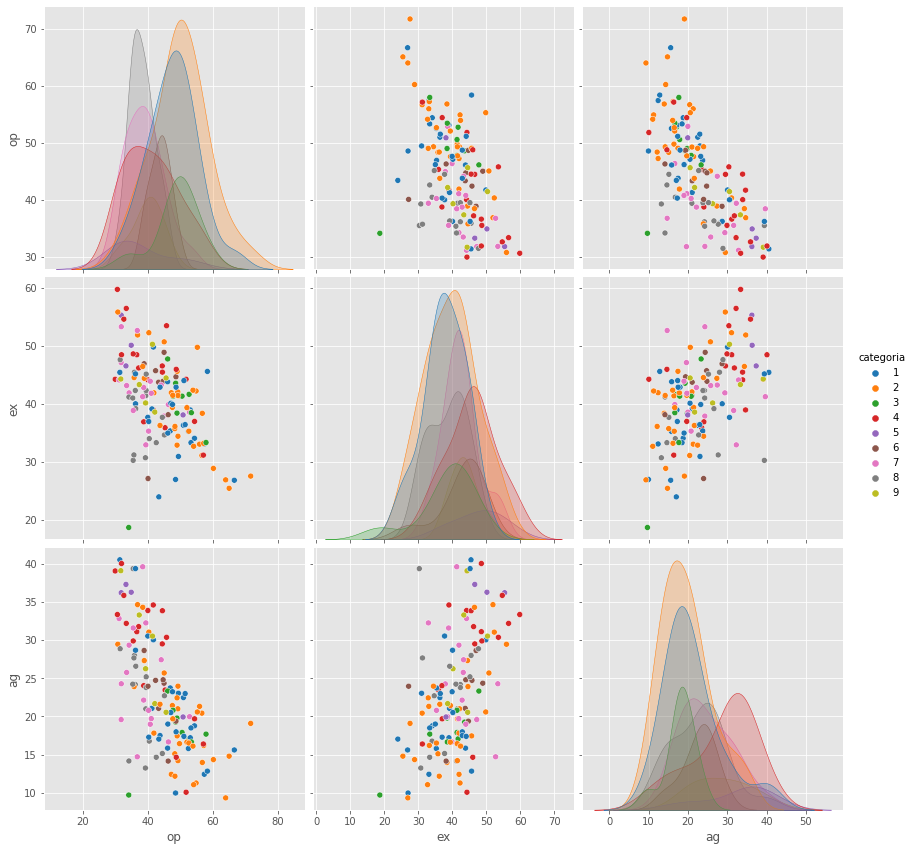

In [27]:
sb.pairplot(df.dropna(), hue='categoria',
            palette = "tab10",
            size=4,vars=["op","ex","ag"],kind='scatter')

Revisando la gráfica no pareciera que haya algún tipo de agrupación o correlación entre los usuarios y sus categorías.

### Definimos la entrada

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. 
Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X

In [28]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(df[["op","ex","ag"]])
y = np.array(df['categoria'])
X.shape

(140, 3)

Ahora veremos una gráfica en 3D con 9 colores representando las categorías.

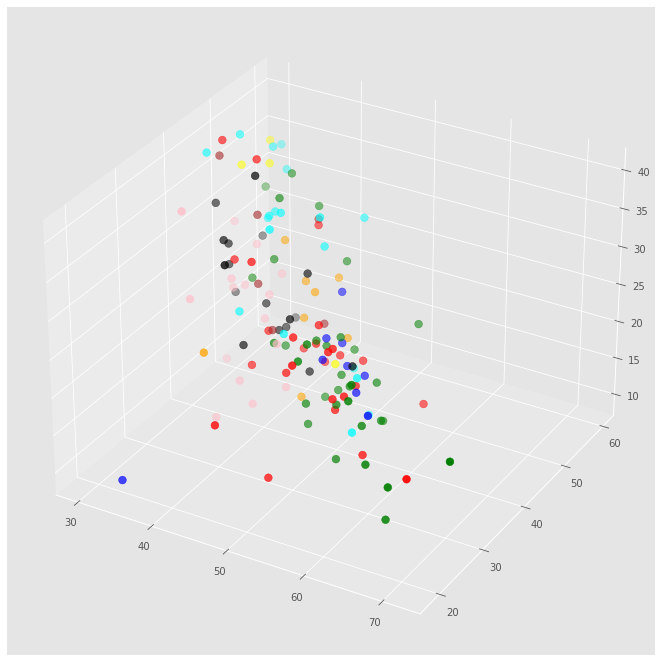

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

Veremos si con K-means, podemos “pintar” esta misma gráfica de otra manera, con clusters diferenciados.

### Buscamos el valor K

Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

#### Elegir el valor de K-->Punto de codo
Este algoritmo funciona pre-seleccionando un valor de K. 
Para encontrar el número de clusters en los datos, deberemos ejecutar el algoritmo para un rango de valores K, ver los resultados y comparar características de los grupos obtenidos. En general no hay un modo exacto de determinar el valor K, pero se puede estimar con aceptable precisión siguiendo la siguiente técnica:

Una de las métricas usada para comparar resultados es la distancia media entre los puntos de datos y su centroide. 
Como el valor de la media diminuirá a medida de aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y entontrar el “punto codo”, donde la tasa de descenso se “afila”. 

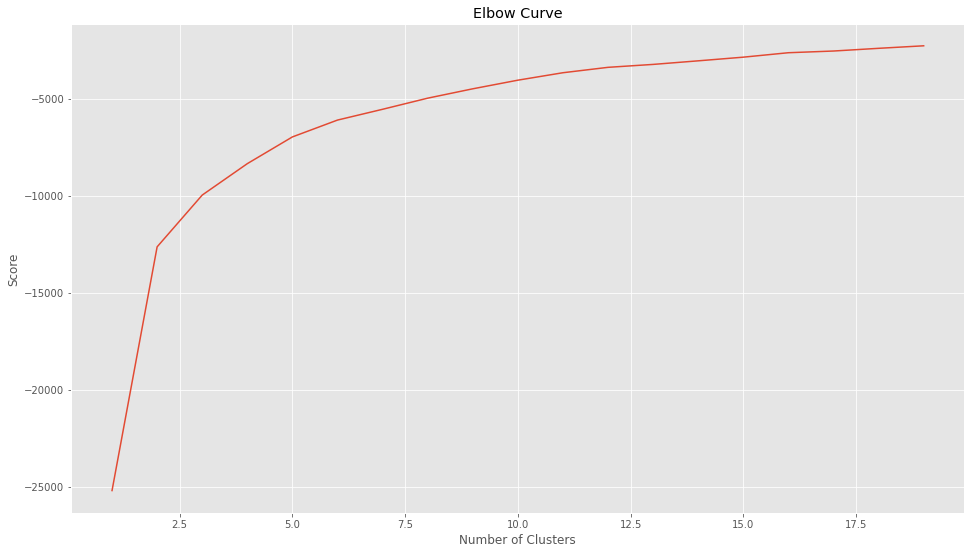

In [30]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. 
Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

### Ejecutamos K-Means

In [37]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
#X = np.array(df[["op","ex","ag"]])
#y = np.array(df['categoria'])
kmeans = KMeans(n_clusters=5,
                random_state = 0,
                n_jobs = -1
               ).fit(X)
#obtenemos los centroides
centroids = kmeans.cluster_centers_
print(centroids)
#'ops'/'ex'/'ag'

[[58.70462307 30.53566167 15.72207033]
 [39.55874337 44.81190669 24.291027  ]
 [35.39154169 47.17372597 34.50044186]
 [50.15530371 40.81295548 17.39048745]
 [42.66891482 33.31008136 21.11530482]]


C:\Users\miguel.postigo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [52]:
kmeans.labels_

array([2, 4, 2, 2, 2, 1, 1, 2, 3, 4, 3, 4, 0, 3, 1, 3, 2, 1, 3, 2, 2, 3,
       4, 2, 3, 4, 1, 1, 1, 3, 1, 3, 3, 3, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1,
       3, 0, 3, 3, 2, 1, 3, 1, 1, 0, 2, 3, 4, 3, 4, 0, 4, 4, 3, 0, 1, 1,
       0, 0, 3, 1, 1, 4, 3, 3, 4, 0, 1, 2, 2, 2, 2, 1, 0, 3, 4, 1, 3, 1,
       3, 3, 3, 4, 4, 3, 3, 1, 2, 3, 2, 3, 0, 3, 3, 2, 0, 3, 1, 1, 1, 3,
       3, 2, 2, 2, 1, 3, 4, 0, 2, 1, 4, 2, 3, 4, 0, 4, 4, 3, 3, 4, 3, 3,
       4, 1, 0, 2, 2, 0, 3, 2])

Vamos a usar esta instrucción para ver cómo han quedado distribuidos los individuos en cada uno de los grupos 

In [42]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3, 4]), array([15, 32, 29, 42, 22], dtype=int64))

El primer cluster tiene 15 individuos, y el que más tiene es el 4ºcluster, con 42

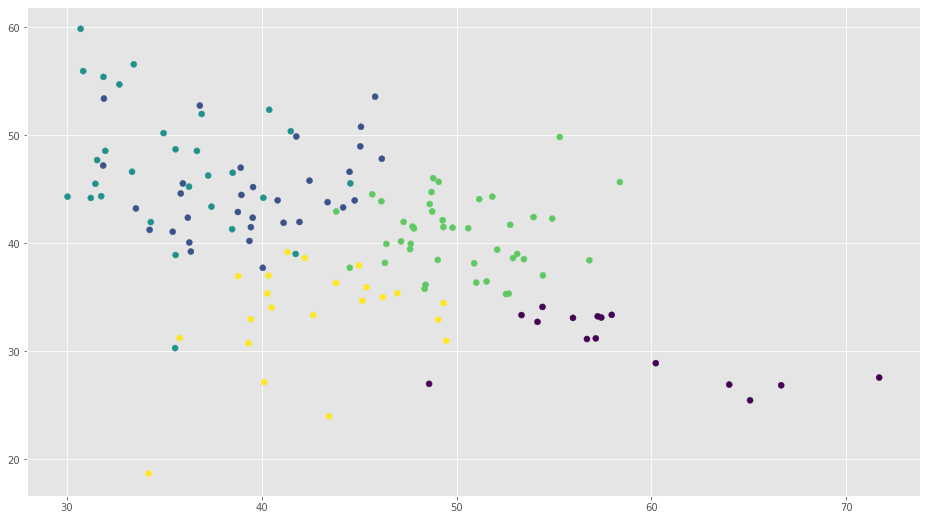

In [43]:
plt.scatter(df["op"],df["ex"],c = kmeans.labels_)
plt.show()

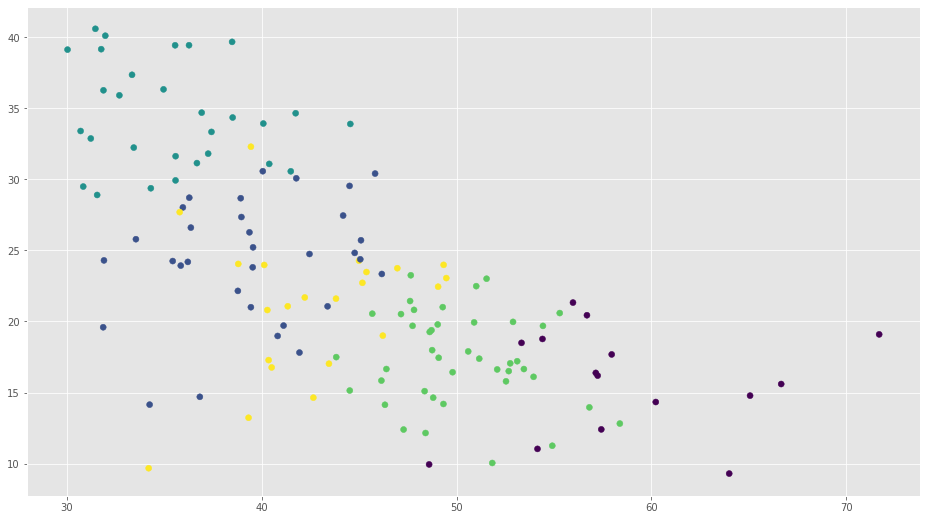

In [44]:
plt.scatter(df["op"],df["ag"],c = kmeans.labels_)
plt.show()

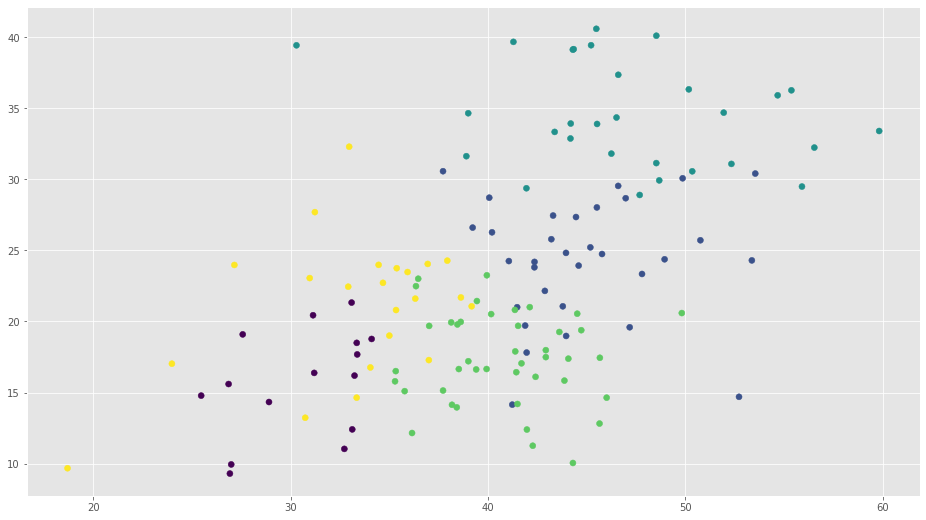

In [47]:
plt.scatter(df["ex"],df["ag"],c = kmeans.labels_)
plt.show()

Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

In [51]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
print(labels)
#or
kmeans.labels_

[2 4 2 2 2 1 1 2 3 4 3 4 0 3 1 3 2 1 3 2 2 3 4 2 3 4 1 1 1 3 1 3 3 3 2 2 1
 2 1 4 1 1 1 1 3 0 3 3 2 1 3 1 1 0 2 3 4 3 4 0 4 4 3 0 1 1 0 0 3 1 1 4 3 3
 4 0 1 2 2 2 2 1 0 3 4 1 3 1 3 3 3 4 4 3 3 1 2 3 2 3 0 3 3 2 0 3 1 1 1 3 3
 2 2 2 1 3 4 0 2 1 4 2 3 4 0 4 4 3 3 4 3 3 4 1 0 2 2 0 3 2]


array([2, 4, 2, 2, 2, 1, 1, 2, 3, 4, 3, 4, 0, 3, 1, 3, 2, 1, 3, 2, 2, 3,
       4, 2, 3, 4, 1, 1, 1, 3, 1, 3, 3, 3, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1,
       3, 0, 3, 3, 2, 1, 3, 1, 1, 0, 2, 3, 4, 3, 4, 0, 4, 4, 3, 0, 1, 1,
       0, 0, 3, 1, 1, 4, 3, 3, 4, 0, 1, 2, 2, 2, 2, 1, 0, 3, 4, 1, 3, 1,
       3, 3, 3, 4, 4, 3, 3, 1, 2, 3, 2, 3, 0, 3, 3, 2, 0, 3, 1, 1, 1, 3,
       3, 2, 2, 2, 1, 3, 4, 0, 2, 1, 4, 2, 3, 4, 0, 4, 4, 3, 3, 4, 3, 3,
       4, 1, 0, 2, 2, 0, 3, 2])

es un "array" donde nos indica a qué "cluster" pertenece cada una de las observaciones

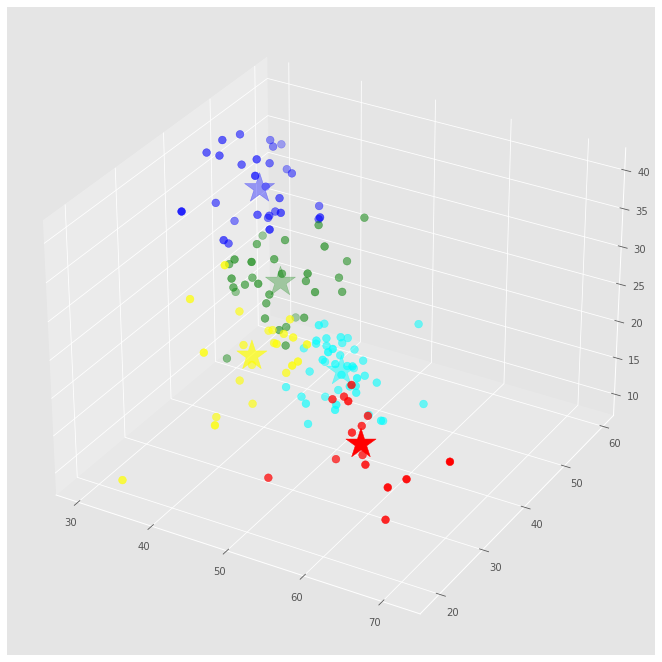

In [53]:
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

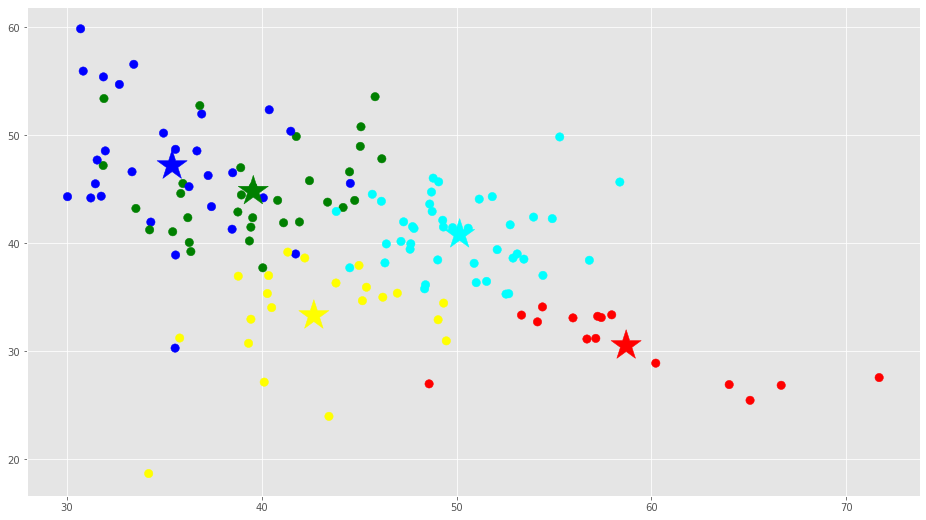

In [55]:
# Hacemos una proyección a 2D con los diversos ejes 
#plt.scatter(df["op"],df["ex"],c = kmeans.labels_)
#plt.show()

f1 = df['op'].values
f2 = df['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000) #asigno un caracter especial al centroide-->estrella
plt.show()

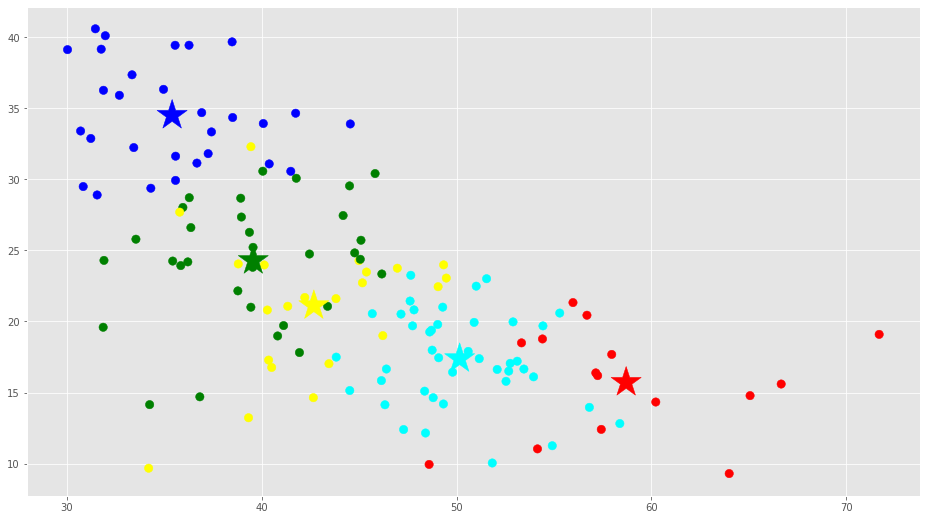

In [57]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['op'].values
f2 = df['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

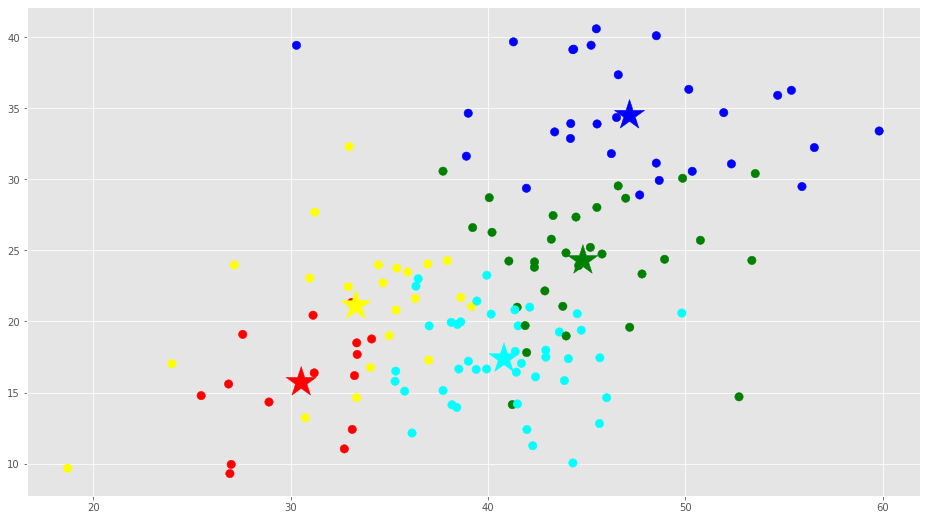

In [64]:
f1 = df['ex'].values
f2 = df['ag'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(df['categoria'].values,C[:, 1] , C[:, 2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

En estas gráficas vemos que están bastante bien diferenciados los grupos

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [75]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=df['usuario'].values
copy['categoria']=df['categoria'].values
copy['label'] = labels;
copy

,usuario,categoria,label
0,3gerardpique,7,2
1,aguerosergiokun,7,4
2,albertochicote,4,2
3,AlejandroSanz,2,2
4,alfredocasero1,4,2
...,...,...,...
135,XabiAlonso,7,2
136,XaviRodriguez,4,2
137,xoellopez,2,0
138,ZacEfron,1,3


In [76]:
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,15
1,green,32
2,blue,29
3,cyan,42
4,yellow,22


In [67]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3, 4]), array([15, 32, 29, 42, 22], dtype=int64))

Y podemos ver la diversidad en rubros laborales de cada uno. 
Por ejemplo en el grupo 3 (cyan), vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos.

In [69]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 3
group_referrer_index = copy['label'] == 3 #boolean array
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


De categoría 3 “modelos” hay 6 sobre un total de 9

In [70]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

AvrilLavigne 2 3
britneyspears 2 3
celinedion 2 3
Courtney 2 3
Fergie 2 3
gwenstefani 2 3
IamStevenT 2 3
JessieJ 2 3
kanyewest 2 3
katyperry 2 3
KidRock 2 3
LennyKravitz 2 3
MariahCarey 2 3
shakira 2 3
taylorswift13 2 3


Buscaremos los usuarios que están más cerca a los centroides de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [71]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest #posiciones en el array de usuarios

array([ 82, 107, 121,  21,  91], dtype=int64)

In [73]:
#sacamos los nombres
users=df['usuario'].values #array con todos los valores de la columna usuarios
for row in closest:
    print(users[row])

JudgeJudy
Pablo_Iglesias_
SerranoIsmael
carmenelectra
kobebryant


En los centros vemos que tenemos una actriz, un político, presentadora de Tv, cantante y un deportista

In [77]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

aplusk 1 0
enrique305 2 0
foofighters 2 0
HilaryDuff 2 0
IanMcKellen 1 0
JerrySeinfeld 1 0
jessicaalba 1 0
JLo 2 0
JudgeJudy 4 0
MeganFox516 1 0
OfficialAdele 2 0
rihanna 2 0
springsteen 2 0
victoriabeckham 3 0
xoellopez 2 0


# Clasificar nuevas muestras
Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. 
Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 1 (verde).

In [78]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

[1]


NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color
No obstante, he incorporador le parámetro "random_state=0" al generar los *kmeans*
simplemente lo he añadido para que si quieres replicar estos resultados obtengas los mismos "clusters" que he obtenido yo